# Regressão Linear em Python

Importa bibliotecas necessárias:

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

np.random.seed(42)

Define o tamanho da amostra

In [2]:
nsample = 100

Cria um vetor do tamanho da amostra, igualmente espaçado entre 0 e 10

In [3]:
x = np.linspace(0, 10, nsample)

Cria um vetor, agora de 2 posição, onde a primeira agora é o próprio valor e a segunda ele ao quadrado.

In [4]:
X = np.column_stack((x, x**2))

Adiciona uma coluna de "1"s para ser a constante do modelo

In [5]:
X = sm.add_constant(X)

Define os coeficientes do modelo, isto é o modelo verdadeiro seria equivalente a:

$ y = 1 + 0.1x_1 + 10x_2 $

In [6]:
beta = np.array([1, 0.2, 10])

Cria um ruído branco gaussiano para não ser possível recuperar perfeitamente os coeficientes acima:

In [7]:
e = np.random.normal(size=nsample)*25

Calcula a variável resposta multiplicando as variáveis explicativas pelos seus coeficientes e adiciona o ruído

In [8]:
y = np.dot(X, beta) + e

Realiza a regressão:

In [9]:
model = sm.OLS(y, X)
results = model.fit()

Plota a linha da regressão e os pontos da variável resposta:

Text(0.5, 1.0, 'Regressão Linear')

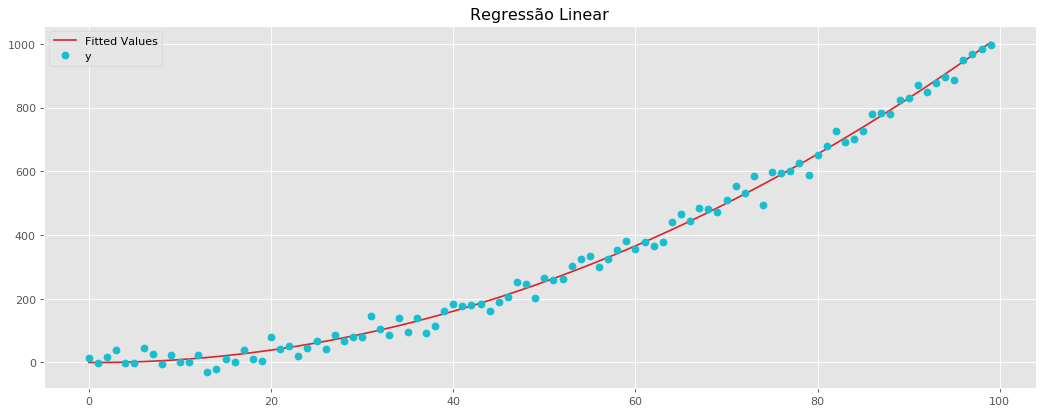

In [10]:
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(16,6), dpi = 80)
ax.plot(results.fittedvalues, label = "Fitted Values", c = "tab:red")
ax.plot(y, 'o', label = "y", c = "tab:cyan")
ax.legend()
ax.set_title("Regressão Linear")

Exibe a ficha os resultados da regressão

In [11]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     8789.
Date:                Tue, 21 Apr 2020   Prob (F-statistic):          2.30e-110
Time:                        20:00:34   Log-Likelihood:                -453.36
No. Observations:                 100   AIC:                             912.7
Df Residuals:                      97   BIC:                             920.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2969      6.726     -0.044      0.9

# Teoria

## Matemática da regressão Linear

## As Premissas da Regressão Linear Clássica

O livro do Peter Kennedy faz uma ótima revisão das premissas, detalhando quais problemas podem ocorrer se cada uma delas é quebrada, abaixo fazemos um resumo de cada uma:

+ A variável resposta deve ter uma relação linear com as variáveis explicativas;
+ Que os resíduos possuem mesma variancia e não são correlacionados um com o outro:
    + Heterocedasticidade, quando os resíduos não possuem mesma variância;
    + Erros não autocorrelacionados, quando os resíduos são correlacionados um com os outros;
+ Que as variáveis explicativas podem ser amostradas novamente com os mesmos valores, ou seja, que são livres de erros de medição;
+ Que o número de observações é maior do que o número de variáveis explicativas. Além disso, que não existe relação linear entre as variáveis explicativas.

Existem testes estatísticos para validar as hipóteses acima. Primeiramente vamos ao testa mais conhecido, que é a análise do P-Valor dos parâmetros do modelo. Nesta parte é importânte o conhecimento de teste de hipóteses, a Wikipédia possui um [artigo interessante](https://pt.wikipedia.org/wiki/Testes_de_hip%C3%B3teses) sobre o tema.

O teste de significância dos parâmetros do modelo testa a hipótese do beta da variável explicativa ser diferênte de zero, isto é:

+ Hipótese nula ($H_0$): O beta da variável explicativa é igual a 0;  
+ Hipótese alternativa ($H_1$): O beta da variável explicativa é diferente de 0.

Geralmente considerá-se que devemos remover todas as variáveis explicativas com P-Valor maior do que 0,05 do modelo, já que estatisticamente não podemos dizer que a variável é diferente de zero. A exceção é a constante, que, na maioria dos casos, devemos manter independentemente do P-Valor. Para mais detalhes do teste, o [Portal Action tem um excelente artigo sobre o tema](http://www.portalaction.com.br/analise-de-regressao/15-analise-de-variancia).

# Teste de Autocorrelação

Este teste é mais importante quando se fala de séries temporais. Imagine a crise do Covid-19 em relação a alguma métrica da economia, é esperado que os resíduos destes pontos sejam correlacionados entre si, já que um evento diferente aconteceu, onde nos demais pontos da série não.

Existem vários testes de hipótese para testar correlação serial, dentre eles:

+ [Breusch–Godfrey](https://en.wikipedia.org/wiki/Breusch%E2%80%93Godfrey_test);
+ [Durbin–Watson](https://en.wikipedia.org/wiki/Durbin%E2%80%93Watson_statistic);
+ [Ljung–Box test](https://en.wikipedia.org/wiki/Ljung%E2%80%93Box_test).

Meu favorito é o teste de [Breusch–Godfrey](http://www.real-statistics.com/multiple-regression/autocorrelation/breusch-godfrey-test/), pois também é possível utilizá-lo para modelos do tipo ARIMA, iremos falar destes modelos em uma próxima conversa.

O Breusch–Godfrey pode ser encontrado na próxima biblioteca StatsModels, sua documentação está [aqui](https://www.statsmodels.org/stable/generated/statsmodels.stats.diagnostic.acorr_breusch_godfrey.html). As hipóteses de teste são:

+ Hipótese nula ($H_0$): Não existe correlação serial de ordem até "p" (que é escolhido por quem está utilizando o teste);  
+ Hipótese alternativa ($H_1$): Existe correlação serial de ao menos uma ordem até "p".

Desta maneira, não queremos descartar a hipótese nula, i.e., queremos um P-Valor maior do que 0,05.

In [12]:
bg_results = sm.stats.diagnostic.acorr_breusch_godfrey(results, nlags = 1)

In [13]:
{"Lagrange multiplier test statistic.":bg_results[0],
"The p-value for Lagrange multiplier test.":bg_results[1],
"The value of the f statistic for F test, alternative version of the same test based on F test for the parameter restriction.":bg_results[2],
"The pvalue for F test.":bg_results[3]}

{'Lagrange multiplier test statistic.': 0.0762423749165686,
 'The p-value for Lagrange multiplier test.': 0.7824557322045582,
 'The value of the f statistic for F test, alternative version of the same test based on F test for the parameter restriction.': 0.07324852633597133,
 'The pvalue for F test.': 0.7872453807108689}

# Teste de Heterocedasticidade

A variância dos erros deve ser constante em todos os pontos, esta premissa é bem forte. Em muitos problemas tratados o erro percentual é constante, mas em valor absoluto não. Por exemplo, é esperado que 

## Normalidade dos resíduos

## Bibliografia:

O código da regressão foi baseado no exemplo da biblioteca:  
https://www.statsmodels.org/dev/examples/notebooks/generated/ols.html

[1] [Kennedy, Peter. A Guide to Econometrics.John Wiley and Sons Ltd, 2008.](https://www.amazon.com/Guide-Econometrics-6th-Peter-Kennedy/dp/1405182571)